## **Groceries Basket Analysis**

In [1]:
# Install ayori library
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5953 sha256=fda6817698918292203333032e2289457a423339fabfa246032d4de9e008db9c
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori
import networkx as nx

In [4]:
df = pd.read_csv("part-00000-tid-4611079234905627429-65267d3c-1857-4437-b6ac-643be88b7a97-12-1-c000.csv", header=None)

In [5]:
df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
355,beef,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9539,bottled water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1400,finished products,beef,tropical fruit,spread cheese,rolls/buns,waffles,chocolate,specialty chocolate,hair spray,shopping bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
949,other vegetables,chewing gum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1969,hygiene articles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8517,frankfurter,whole milk,processed cheese,ice cream,canned fish,hygiene articles,cling film/bags,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2602,frankfurter,beef,citrus fruit,whole milk,rolls/buns,semi-finished bread,coffee,bottled beer,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,sausage,pip fruit,whole milk,curd,yogurt,sliced cheese,rolls/buns,bottled water,hygiene articles,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7894,newspapers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9743,frankfurter,citrus fruit,other vegetables,whole milk,condensed milk,rolls/buns,white bread,coffee,fruit/vegetable juice,bottled beer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. The first line removes the first column from the DataFrame.
2. The second line removes the first row from the DataFrame.

In [6]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(9834, 32)

In [8]:
df.size

314688

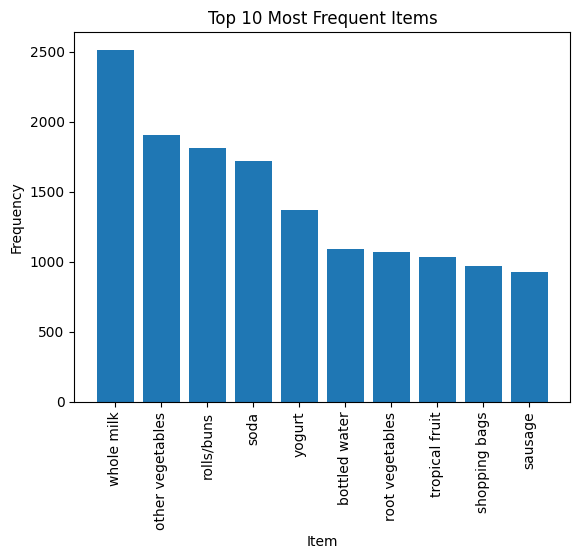

In [9]:
# Item frequency analysis
item_counts = df.apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False)
top_items = item_counts.head(10)
plt.bar(top_items.index, top_items.values)
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Items')
plt.xticks(rotation=90)
plt.show()

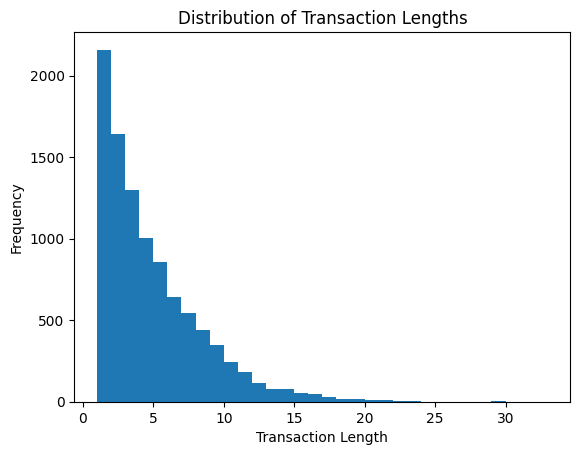

In [10]:
# Transaction analysis
transaction_lengths = df.notnull().sum(axis=1)
plt.hist(transaction_lengths, bins=range(1, max(transaction_lengths) + 2))
plt.xlabel('Transaction Length')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Lengths')
plt.show()

# **The Apriori Model**

In [12]:
transactions = []
for i in range(9834):
  transactions.append([str(df.values[i,j]) for j in range(32)])

In [13]:
rules = apriori(transactions = transactions,
                min_support = 0.003,
                min_confidence = 0.2,
                min_lift = 3,
                min_length = 2,
                max_length = 2)

In [14]:
# Display the results coming directly from the output of the apriori function
results = list(rules)
results[:3]

[RelationRecord(items=frozenset({'hamburger meat', 'Instant food products'}), support=0.003050640634533252, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'hamburger meat'}), confidence=0.37974683544303794, lift=11.420276390663105)]),
 RelationRecord(items=frozenset({'whipped/sour cream', 'baking powder'}), support=0.004575960951799878, ordered_statistics=[OrderedStatistic(items_base=frozenset({'baking powder'}), items_add=frozenset({'whipped/sour cream'}), confidence=0.25862068965517243, lift=3.607483492296405)]),
 RelationRecord(items=frozenset({'root vegetables', 'beef'}), support=0.017388651616839536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'beef'}), items_add=frozenset({'root vegetables'}), confidence=0.3313953488372093, lift=3.0400577056577576)])]

In [15]:
# Put the results well organised into a Pandas DataFrame
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))

resultsinDataFrame = pd.DataFrame(inspect(results),
                                  columns = ['Product 1',
                                             'Product 2',
                                             'Support',
                                             'Confidence',
                                             'Lift'
                                            ])

In [16]:
# Display the results non sorted
resultsinDataFrame

,Product 1,Product 2,Support,Confidence,Lift
0,Instant food products,hamburger meat,0.003051,0.379747,11.420276
1,baking powder,whipped/sour cream,0.004576,0.258621,3.607483
2,beef,root vegetables,0.017389,0.331395,3.040058
3,berries,whipped/sour cream,0.009050,0.272171,3.796499
4,liquor,bottled beer,0.004678,0.422018,5.240061
5,red/blush wine,bottled beer,0.004881,0.253968,3.153439
6,flour,margarine,0.003762,0.216374,3.700564
7,flour,sugar,0.004983,0.286550,8.462252
8,flour,whipped/sour cream,0.004068,0.233918,3.262909
9,herbs,root vegetables,0.007016,0.431250,3.956075


In [17]:
# Display the results sorted by descending lifts
resultsinDataFrame.nlargest(n = 13, columns = 'Lift')

,Product 1,Product 2,Support,Confidence,Lift
0,Instant food products,hamburger meat,0.003051,0.379747,11.420276
7,flour,sugar,0.004983,0.286550,8.462252
10,processed cheese,white bread,0.004169,0.251534,5.974838
4,liquor,bottled beer,0.004678,0.422018,5.240061
9,herbs,root vegetables,0.007016,0.431250,3.956075
3,berries,whipped/sour cream,0.009050,0.272171,3.796499
11,rice,root vegetables,0.003152,0.413333,3.791716
6,flour,margarine,0.003762,0.216374,3.700564
1,baking powder,whipped/sour cream,0.004576,0.258621,3.607483
8,flour,whipped/sour cream,0.004068,0.233918,3.262909


# **Visualization**

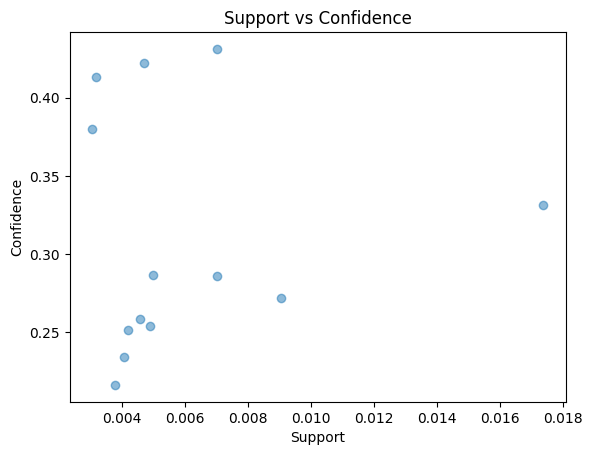

In [18]:
# Plot support vs confidence
plt.scatter(resultsinDataFrame['Support'], resultsinDataFrame['Confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

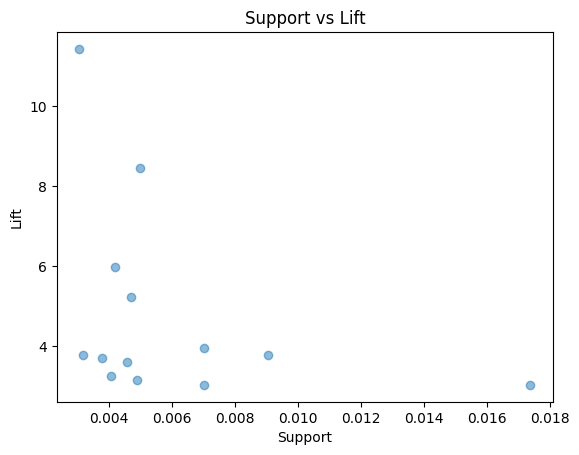

In [19]:
# Plot support vs lift
plt.scatter(resultsinDataFrame['Support'], resultsinDataFrame['Lift'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support vs Lift')
plt.show()

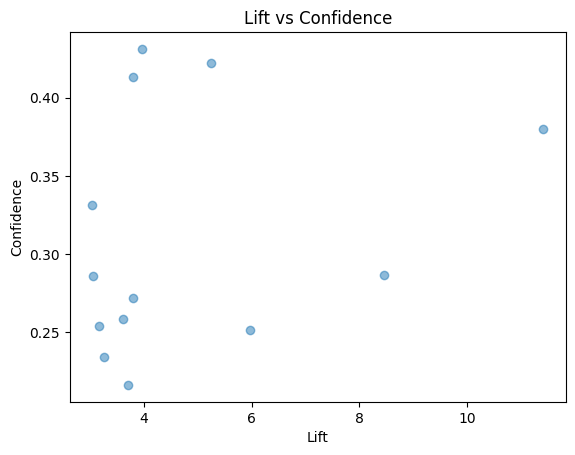

In [20]:
# Plot lift vs confidence
plt.scatter(resultsinDataFrame['Lift'], resultsinDataFrame['Confidence'], alpha=0.5)
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence')
plt.show()

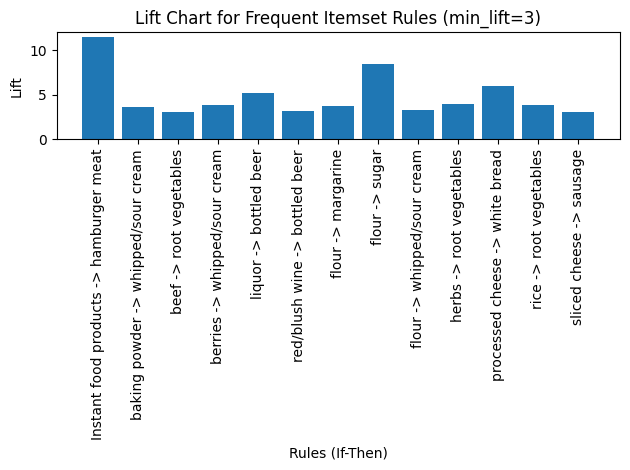

In [21]:
# Lift chart
products_1 = resultsinDataFrame["Product 1"].tolist()
products_2 = resultsinDataFrame["Product 2"].tolist()
lifts = resultsinDataFrame["Lift"].tolist()

rules_labels = [f"{product1} -> {product2}" for product1, product2 in zip(products_1, products_2)]

plt.bar(rules_labels, lifts)
plt.xlabel("Rules (If-Then)")
plt.ylabel("Lift")
plt.title("Lift Chart for Frequent Itemset Rules (min_lift=3)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

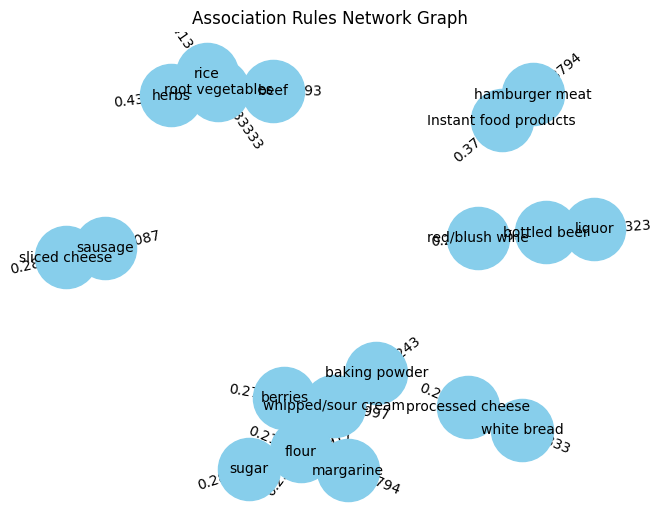

In [22]:
# Association rules network graph
G = nx.Graph()

for product in resultsinDataFrame['Product 1']:
    G.add_node(product)
for product in resultsinDataFrame['Product 2']:
    G.add_node(product)

for index, row in resultsinDataFrame.iterrows():
    G.add_edge(row['Product 1'], row['Product 2'], weight=row['Confidence'])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Association Rules Network Graph')
plt.show()